In [2]:
from neural_network import *

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from scipy.stats import norm

In [3]:
input_size1 = 5
output_size1 = 2
input_size2 = 3
output_size2 = 2

filename = 'model.pt'

NN = Neural_network(input_size1,output_size1,input_size2,output_size2)

NN.load(filename)
NN.eval()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
HV = 1/np.tan(35*np.pi/180)

In [5]:
pars = {'c':8.3, 'phi':31.6, 'gamma':15, 'c_cov':30, 'phi_cov':20, 'gamma_cov':7, 'H':10, 'HV':HV}
costs = {'operation':5, 'escavation':13, 'failure1':20, 'failure2':10000, 'expansion':1.2}

In [6]:
def perform_sweep(pars,costs,var,n_cases=101):

    ranges = {'c': [5, 30],
              'phi': [20, 35],
              'gamma': [15, 20],
              'c_cov': [10, 50],
              'phi_cov': [10, 30],
              'gamma_cov': [3, 11]}

    data_in = np.tile(np.array([pars['c'],pars['phi'],pars['gamma'],pars['HV'],pars['H'],pars['c_cov'],pars['phi_cov'],pars['gamma_cov']]),(n_cases,1))

    df_in = pd.DataFrame(data_in,columns=['c','phi','gamma','HV','H','c_cov','phi_cov','gamma_cov'])

    df_in[var]=np.linspace(ranges[var][0],ranges[var][1],n_cases)

    df = NN.run_model(df_in,costs=costs)

    return df


In [7]:
var = 'gamma'

df = perform_sweep(pars,costs,var)

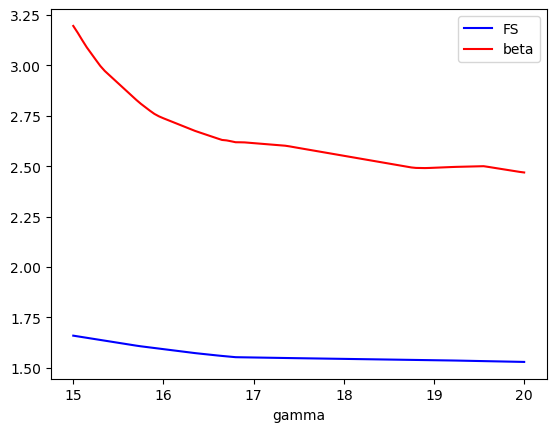

In [8]:
plt.plot(df[var],df['FS'],'b',label='FS')
plt.plot(df[var],df['beta'],'r',label='beta')

plt.xlabel(var)
plt.legend()


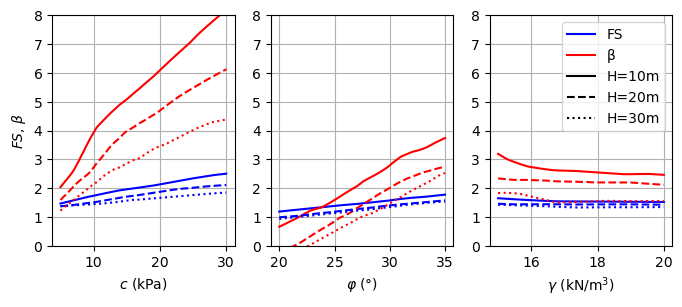

In [9]:
vars = ['c','phi','gamma']
var_names = ['$c$ (kPa)', '$φ$ (°)', '$γ$ (kN/m$^3$)']

symbols = ['-','--',':']

plt.figure(figsize=(8, 3))

for i in range(0,3):
    for j in range(0,3):
        pars['H'] = 10 + 10*j
        df = perform_sweep(pars,costs,vars[i])

        plt.subplot(1,3,i+1)
        plt.plot(df[vars[i]],df['FS'],f'b{symbols[j]}',label='FS')
        plt.plot(df[vars[i]],df['beta'],f'r{symbols[j]}',label='β')

        plt.xlabel(var_names[i])
        if i == 2 and j == 0:
            for k in range(0,3):
                plt.plot(np.nan,np.nan,f'k{symbols[k]}',label=f'H={10 + 10*k}m')

            plt.legend()

        if i == 0:
            plt.ylabel('$FS$, $β$')

    plt.grid(True)

    plt.ylim((0,8))
    

In [10]:
pars['H'] = 10
df = perform_sweep(pars,costs,'c')

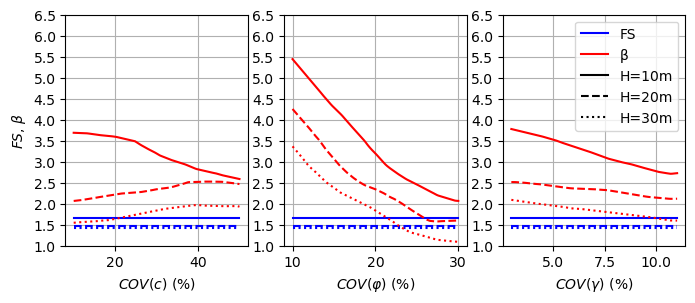

In [15]:
vars = ['c_cov','phi_cov','gamma_cov']
var_names = ['$COV$($c$) (%)', '$COV$($φ$) (%)', '$COV$($γ$) (%)']

symbols = ['-','--',':']

plt.figure(figsize=(8, 3))

for i in range(0,3):
    for j in range(0,3):
        pars['H'] = 10 + 10*j
        df = perform_sweep(pars,costs,vars[i])

        plt.subplot(1,3,i+1)
        plt.plot(df[vars[i]],df['FS'],f'b{symbols[j]}',label='FS')
        plt.plot(df[vars[i]],df['beta'],f'r{symbols[j]}',label='β')

        plt.xlabel(var_names[i])
        if i == 2 and j == 0:
            for k in range(0,3):
                plt.plot(np.nan,np.nan,f'k{symbols[k]}',label=f'H={10 + 10*k}m')

            plt.legend(loc='upper right')

        if i == 0:
            plt.ylabel('$FS$, $β$')

    plt.grid(True)

    plt.ylim((1.0,6))
    plt.yticks(np.arange(1.0,7.0,0.5))

    

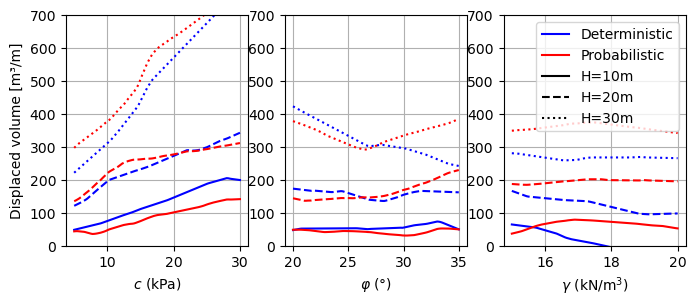

In [12]:
vars = ['c','phi','gamma']
var_names = ['$c$ (kPa)', '$φ$ (°)', '$γ$ (kN/m$^3$)']

symbols = ['-','--',':']

plt.figure(figsize=(8, 3))

for i in range(0,3):
    for j in range(0,3):
        pars['H'] = 10 + 10*j
        df = perform_sweep(pars,costs,vars[i])

        plt.subplot(1,3,i+1)
        plt.plot(df[vars[i]],df['V1'],f'b{symbols[j]}',label='Deterministic')
        plt.plot(df[vars[i]],df['V2'],f'r{symbols[j]}',label='Probabilistic')

        plt.xlabel(var_names[i])

        if i == 0 and j == 0:
            plt.ylabel('Displaced volume [m³/m]')

        if i == 2 and j == 0:
            for k in range(0,3):
                plt.plot(np.nan,np.nan,f'k{symbols[k]}',label=f'H={10 + 10*k}m')

            plt.legend()

    plt.grid(True)

    plt.ylim((0,700))
    

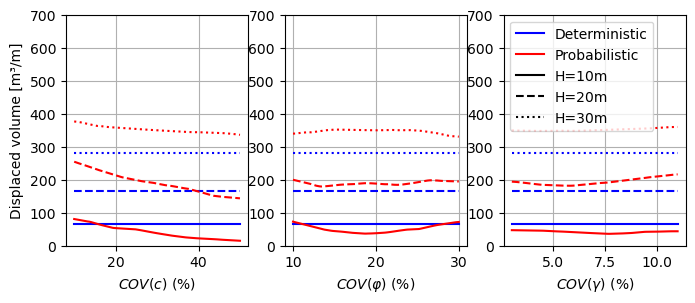

In [16]:
vars = ['c_cov','phi_cov','gamma_cov']
var_names = ['$COV$($c$) (%)', '$COV$($φ$) (%)', '$COV$($γ$) (%)']

symbols = ['-','--',':']

plt.figure(figsize=(8, 3))

for i in range(0,3):
    for j in range(0,3):
        pars['H'] = 10 + 10*j
        df = perform_sweep(pars,costs,vars[i])

        plt.subplot(1,3,i+1)
        plt.plot(df[vars[i]],df['V1'],f'b{symbols[j]}',label='Deterministic')
        plt.plot(df[vars[i]],df['V2'],f'r{symbols[j]}',label='Probabilistic')

        plt.xlabel(var_names[i])

        if i == 0 and j == 0:
            plt.ylabel('Displaced volume [m³/m]')

        if i == 2 and j == 0:
            for k in range(0,3):
                plt.plot(np.nan,np.nan,f'k{symbols[k]}',label=f'H={10 + 10*k}m')

            plt.legend()

    plt.grid(True)

    plt.ylim((0,700))